In [159]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
#Reading data
data = pd.read_csv('/content/drive/MyDrive/Computers/Python/Datasets for data analysis/Census + Income/Data/adult.data')

In [161]:
#Checking the head
data.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# **Cleaning the data**

In [162]:
#Checking the total rows and columns
data.shape
#There are a total of 32560 rows and 15 columns

(32560, 15)

In [163]:
#Checking the datatype of tthe columns
data.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [164]:
#Getting the column names
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [165]:
#Dropping unwanted columns
data.drop(['39',' 77516',' 13',' 40',' 2174',' 0',' White',' Not-in-family'],axis = 1,inplace=True)

In [166]:
#Renaming the columns
data.rename(columns = {' State-gov':'Job_Type',
                       ' Bachelors':'Education',
                       ' Never-married':'Martial_status',
                       ' Adm-clerical':'Job_role',
                       ' United-States' : 'Country',
                       ' Male' : 'Gender',
                       ' <=50K' : 'Income'},inplace = True)

In [167]:
#Shape
data.shape

(32560, 7)

In [168]:
#Checking for duplicate values
data.duplicated().sum()
#There are 26319 duplicates

26319

In [169]:
#Checking for null values
data.isnull().sum()

Job_Type          0
Education         0
Martial_status    0
Job_role          0
Gender            0
Country           0
Income            0
dtype: int64

In [170]:
#Getting unique items from Job_Type
data['Job_Type'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [171]:
#Calculating the number of rows in job_type with '?'
data[data['Job_Type'] == ' ?'].shape[0]

1836

In [172]:
#Deleting rows with '?' from the entire dataset
data = data[data != ' ?'].dropna()

In [173]:
data.shape

(30161, 7)

In [174]:
#Checking if there are any null values
data[data['Country'] == ' ?' ].shape[0]

0

In [175]:
data.columns

Index(['Job_Type', 'Education', 'Martial_status', 'Job_role', 'Gender',
       'Country', 'Income'],
      dtype='object')

In [176]:
#Getting unique values from Martial_status
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

# **Analysis and Visualisation**

In [177]:
#Getting the number of people in each educational value
data['Education'].value_counts()

Education
 HS-grad         9840
 Some-college    6678
 Bachelors       5043
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: count, dtype: int64

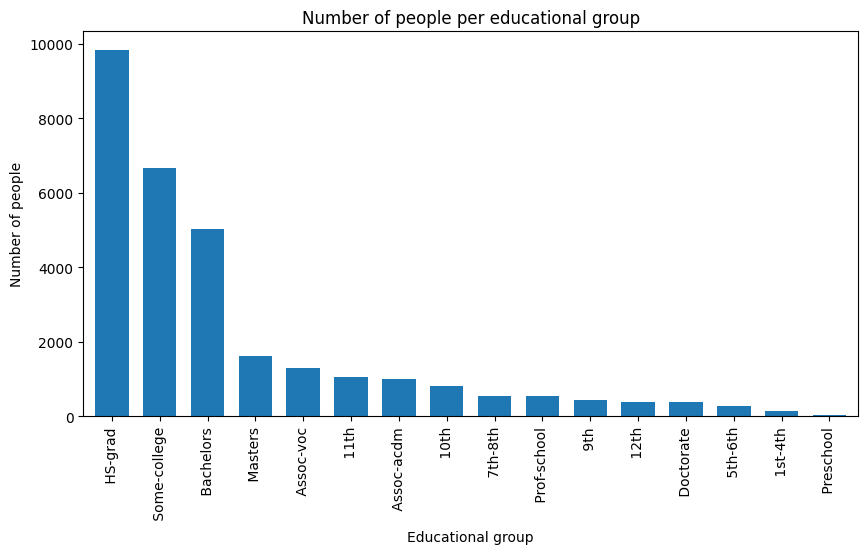

In [178]:
#Plotting a graph for the above
plt.figure(figsize = (10,5))
data['Education'].value_counts().plot(kind = 'bar',width = 0.7)
plt.title('Number of people per educational group')
plt.xlabel('Educational group')
plt.ylabel('Number of people')
plt.show()

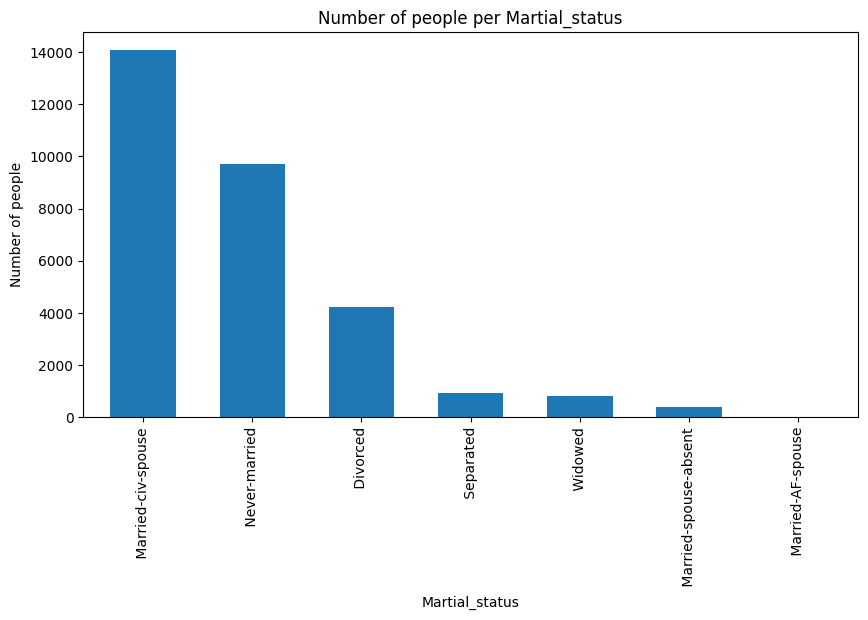

In [179]:
#Plotting the number of people per Martial_status
plt.figure(figsize = (10,5))
data['Martial_status'].value_counts().plot(kind ='bar',width = 0.6)
plt.title('Number of people per Martial_status')
plt.xlabel('Martial_status')
plt.ylabel('Number of people')
plt.show()

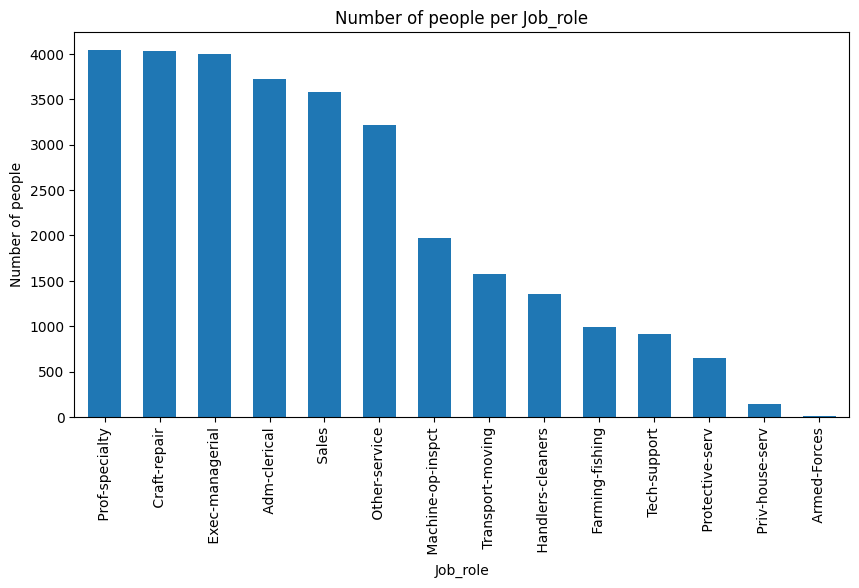

In [180]:
#Plotting the number of people per Job_role
plt.figure(figsize = (10,5))
data['Job_role'].value_counts().plot(kind ='bar',width = 0.6)
plt.title('Number of people per Job_role')
plt.xlabel('Job_role')
plt.ylabel('Number of people')
plt.show()

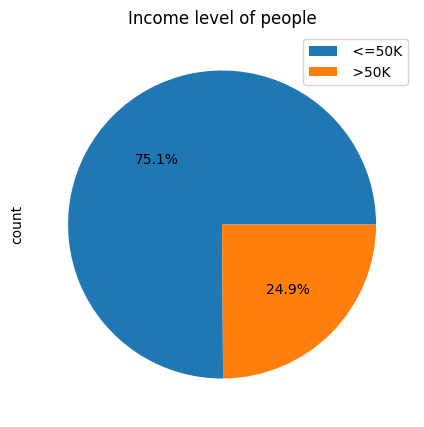

In [181]:
#Plotting the number of people per Income
plt.figure(figsize = (10,5))
data['Income'].value_counts().plot(kind ='pie',autopct='%1.1f%%',labels=None)
plt.legend(labels=data['Income'].value_counts().index,loc='upper right')
plt.title('Income level of people')
plt.show()

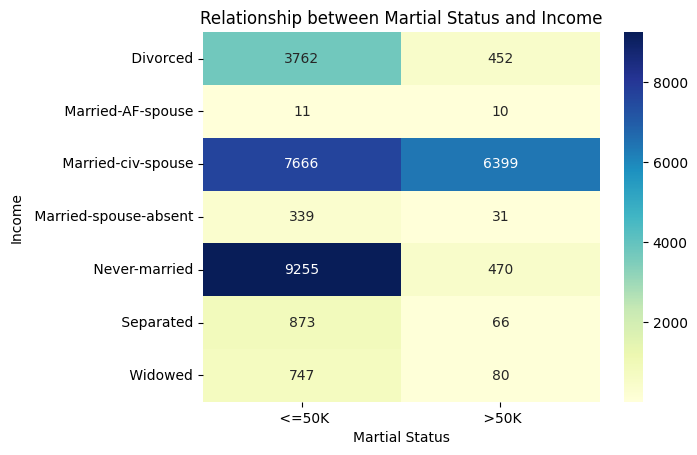

In [182]:
#Getting the relationship between Martial_status and Income
martial_vs_income = pd.crosstab(data['Martial_status'],data['Income'])
sns.heatmap(martial_vs_income, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Relationship between Martial Status and Income")
plt.xlabel("Martial Status")
plt.ylabel("Income")
plt.show()

In [183]:
data.columns

Index(['Job_Type', 'Education', 'Martial_status', 'Job_role', 'Gender',
       'Country', 'Income'],
      dtype='object')

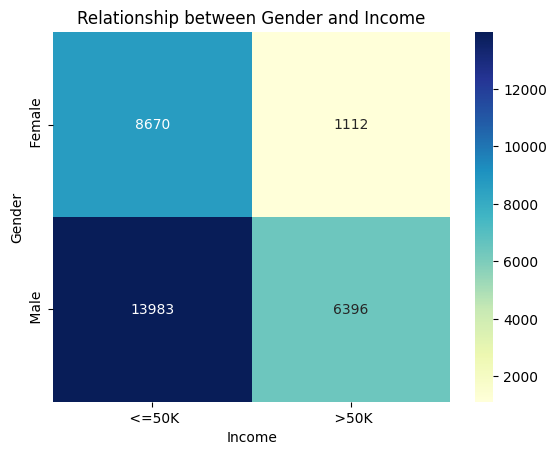

In [184]:
#Getting the relationship between Gender and Income
sns.heatmap(pd.crosstab(data['Gender'],data['Income']),annot = True, cmap="YlGnBu",fmt = 'g')
plt.title('Relationship between Gender and Income')
plt.show()

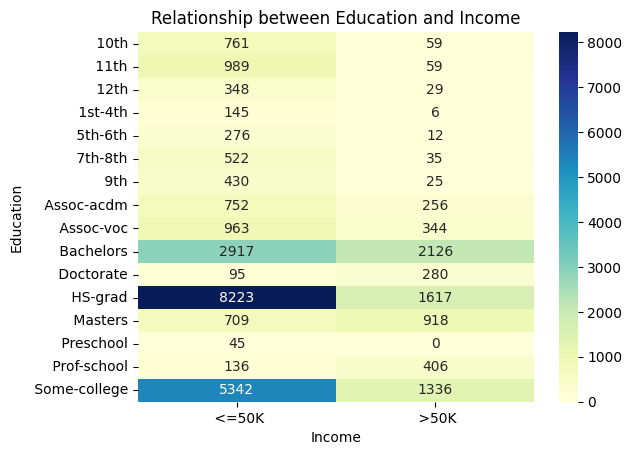

In [185]:
#Relationship between Education and Income
sns.heatmap(pd.crosstab(data['Education'],data['Income']),annot = True,cmap="YlGnBu", fmt = 'g')
plt.title('Relationship between Education and Income')
plt.show()

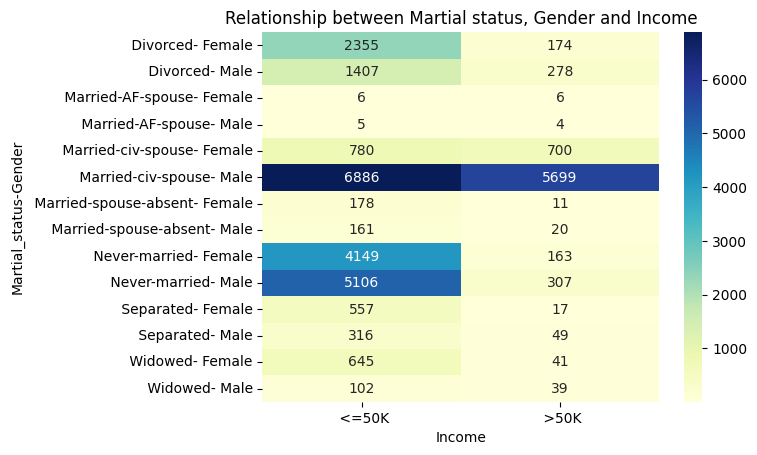

In [186]:
#Getting the relationship between Martial_status, Gender and Income
sns.heatmap(pd.crosstab([data['Martial_status'],data['Gender']],data['Income']),annot = True,cmap="YlGnBu", fmt = 'g')
plt.title('Relationship between Martial status, Gender and Income')
plt.show()

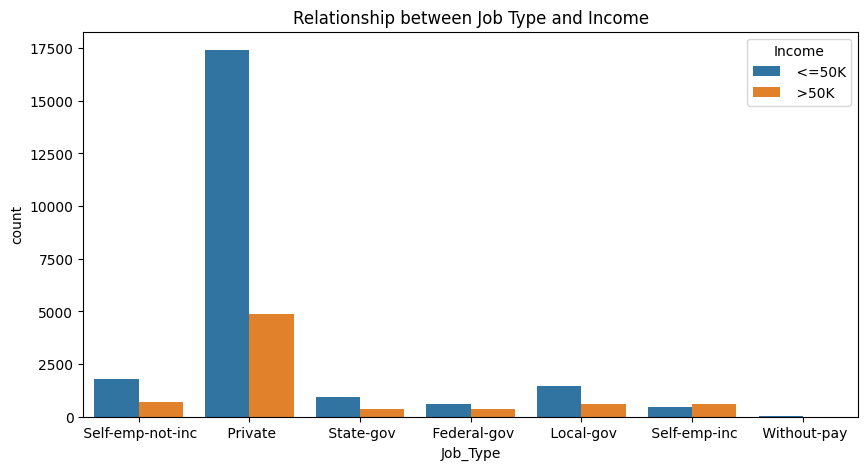

In [187]:
#Visualising the relationship between job_type and income
plt.figure(figsize = (10,5))
sns.countplot(x = 'Job_Type',hue = 'Income',data = data)
plt.title('Relationship between Job Type and Income')
plt.show()